## 1. Regresión Lineal de dataset Vehicle

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn import tree

Contiene información técnica y de mercado de automóviles. El objetivo es predecir el precio del automóvil en función de sus atributos

In [140]:
data = pd.read_csv("./csv/Car details v3_tree.csv", sep=",")

## 1. Análisis exploratorio de los datos

In [141]:
data.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


Columnas y filas del archivo

In [142]:
data.shape

(8128, 13)

In [143]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. Identificación de valores faltantes y atípicos

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

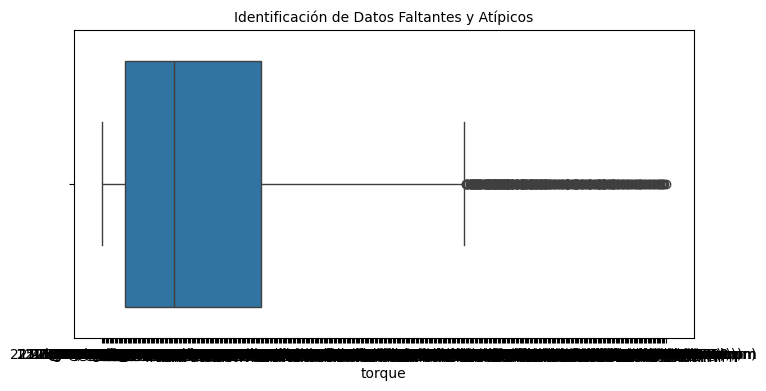

In [144]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['torque'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [145]:
print("Cantidad de Registros vacios en name: ",data['name'].isnull().sum())
print("Cantidad de Registros vacios en year: ",data['year'].isnull().sum())
print("Cantidad de Registros vacios en selling_price: ",data['selling_price'].isnull().sum())
print("Cantidad de Registros vacios en km_driven: ",data['km_driven'].isnull().sum())
print("Cantidad de Registros vacios en fuel: ",data['fuel'].isnull().sum())
print("Cantidad de Registros vacios en seller_type: ",data['seller_type'].isnull().sum())
print("Cantidad de Registros vacios en transmission: ",data['transmission'].isnull().sum())
print("Cantidad de Registros vacios en owner: ",data['owner'].isnull().sum())
print("Cantidad de Registros vacios en mileage: ",data['mileage'].isnull().sum())
print("Cantidad de Registros vacios en engine: ",data['engine'].isnull().sum())
print("Cantidad de Registros vacios en max_power: ",data['max_power'].isnull().sum())
print("Cantidad de Registros vacios en torque: ",data['torque'].isnull().sum())
print("Cantidad de Registros vacios en seats: ",data['seats'].isnull().sum())

Cantidad de Registros vacios en name:  0
Cantidad de Registros vacios en year:  0
Cantidad de Registros vacios en selling_price:  0
Cantidad de Registros vacios en km_driven:  0
Cantidad de Registros vacios en fuel:  0
Cantidad de Registros vacios en seller_type:  0
Cantidad de Registros vacios en transmission:  0
Cantidad de Registros vacios en owner:  0
Cantidad de Registros vacios en mileage:  221
Cantidad de Registros vacios en engine:  221
Cantidad de Registros vacios en max_power:  215
Cantidad de Registros vacios en torque:  222
Cantidad de Registros vacios en seats:  221


In [146]:
print(data.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


Reemplazar todos los valores vacios con el valor mas común de la columna (moda).

In [147]:
data['mileage'] = data['mileage'].fillna(data['mileage'].mode()[0])
data['engine'] = data['engine'].fillna(data['engine'].mode()[0])
data['max_power'] = data['max_power'].fillna(data['max_power'].mode()[0])
data['torque'] = data['torque'].fillna(data['torque'].mode()[0])
data['seats'] = data['seats'].fillna(data['seats'].mode()[0])

In [148]:
print("Cantidad de Registros vacios en mileage: ",data['mileage'].isnull().sum())
print("Cantidad de Registros vacios en engine: ",data['engine'].isnull().sum())
print("Cantidad de Registros vacios en max_power: ",data['max_power'].isnull().sum())
print("Cantidad de Registros vacios en torque: ",data['torque'].isnull().sum())
print("Cantidad de Registros vacios en seats: ",data['seats'].isnull().sum())

Cantidad de Registros vacios en mileage:  0
Cantidad de Registros vacios en engine:  0
Cantidad de Registros vacios en max_power:  0
Cantidad de Registros vacios en torque:  0
Cantidad de Registros vacios en seats:  0


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 3. Entrenamiento del modelo utilizando selección de características

In [150]:
data['seats'].value_counts()

seats
5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [151]:
data[['seats']].head(15)

,seats
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
5,5.0
6,5.0
7,4.0
8,5.0
9,5.0


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [152]:
X = data.drop('seats',axis=1)
Y = data['seats']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [153]:
print(X_train)

                                         name  year  selling_price  km_driven  \
4313                        Hyundai i10 Magna  2012         267000      40000   
5178       Mercedes-Benz New C-Class 200 K AT  2007         500000     120000   
758                        Hyundai EON D Lite  2013         200000      80000   
7117  Chevrolet Tavera Neo 3 LT 9 Seats BSIII  2016         900000     100000   
2606                         Maruti Swift VDI  2013         375000      77000   
...                                       ...   ...            ...        ...   
4931    Tata Manza Aura (ABS) Quadrajet BS IV  2012         300000      70000   
3264                     Ford Figo Diesel EXI  2012         220000     100000   
1653                Hyundai i10 Sportz Option  2009         170000      90000   
2607         Volkswagen Vento Diesel Highline  2012         375000      90000   
2732                   Hyundai i10 Magna 1.1L  2012         225000     110000   

        fuel seller_type tr

In [154]:
print(Y_train)

4313    5.0
5178    5.0
758     5.0
7117    9.0
2606    5.0
       ... 
4931    5.0
3264    5.0
1653    5.0
2607    5.0
2732    5.0
Name: seats, Length: 6096, dtype: float64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

Imprime true si hay columnas con valores vacios o false si estan todos llenos

In [155]:
print(X_test.isnull().any())


name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
dtype: bool


In [156]:
print(X_train.isnull().any())

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
dtype: bool


In [157]:
# Asegurarse de que X_train y X_test tengan las mismas columnas antes de la alineación
X_train, X_test = X_train.align(X_test, join='outer', axis=1)

# Rellenar los valores NaN con ceros después de la alineación
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Convertir las variables categóricas en variables dummy
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Asegurarse de que X_train y X_test tengan las mismas columnas después de crear las variables dummy
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Rellenar los valores NaN con ceros después de crear las variables dummy
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Crear y entrenar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(X_train , Y_train)

# Hacer la predicción
Prediccion = modelo_regresion.predict(X_test)


In [158]:
print(Y_test)

3558    5.0
233     7.0
7952    5.0
572     5.0
6960    5.0
       ... 
2761    4.0
1487    5.0
4284    5.0
5698    5.0
4643    5.0
Name: seats, Length: 2032, dtype: float64


In [159]:
print(Prediccion)

[5. 5. 5. ... 5. 5. 5.]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [160]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        34
         5.0       0.80      1.00      0.89      1605
         6.0       0.00      0.00      0.00        15
         7.0       0.50      0.04      0.08       295
         8.0       0.00      0.00      0.00        64
         9.0       0.00      0.00      0.00        15
        10.0       0.00      0.00      0.00         4

    accuracy                           0.79      2032
   macro avg       0.19      0.15      0.14      2032
weighted avg       0.70      0.79      0.71      2032



c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

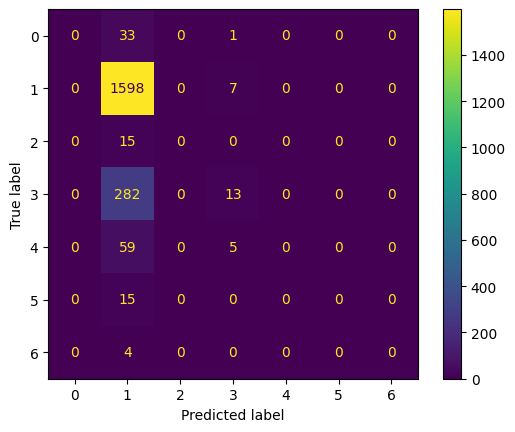

In [161]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

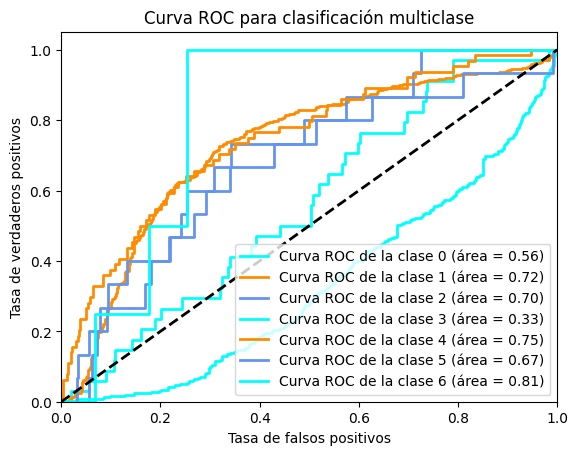

In [162]:
# Binarizar las etiquetas
classes = np.unique(Y_test) # Obtener las clases únicas
Y_test_bin = label_binarize(Y_test, classes=classes)
n_classes = Y_test_bin.shape[1]

# Ajustar el clasificador One-vs-Rest
classifier = OneVsRestClassifier(LogisticRegression(solver = "liblinear"))
classifier.fit(X_train, Y_train)
probas_pred = classifier.predict_proba(X_test)

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], probas_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()


(array([1.000e+00, 0.000e+00, 4.000e+00, 1.600e+01, 6.000e+01, 2.350e+02,
        5.210e+02, 1.883e+03, 2.926e+03, 2.482e+03]),
 array([1983. , 1986.7, 1990.4, 1994.1, 1997.8, 2001.5, 2005.2, 2008.9,
        2012.6, 2016.3, 2020. ]),
 <BarContainer object of 10 artists>)

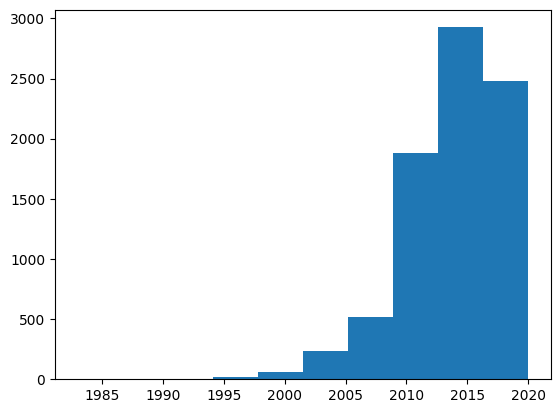

In [163]:
plt.hist(data.year)

In [164]:
predictors_col = ["year", "selling_price"]
target_col = ['fuel']

In [165]:
predictors = data[predictors_col]
target = data[target_col]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [167]:
cars = DecisionTreeClassifier(max_depth=3)

In [168]:
cars.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [169]:
y_pred = cars.predict(X_test)

In [170]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.7214022140221402


[Text(0.5, 0.875, 'x[1] <= 647000.0\ngini = 0.507\nsamples = 6502\nvalue = [49, 3559, 34, 2860]'),
 Text(0.25, 0.625, 'x[0] <= 2015.5\ngini = 0.515\nsamples = 4635\nvalue = [49, 2124, 34, 2428]'),
 Text(0.125, 0.375, 'x[1] <= 245500.0\ngini = 0.513\nsamples = 3409\nvalue = [25, 1819, 34, 1531]'),
 Text(0.0625, 0.125, 'gini = 0.47\nsamples = 1424\nvalue = [18.0, 451.0, 22.0, 933.0]'),
 Text(0.1875, 0.125, 'gini = 0.434\nsamples = 1985\nvalue = [7, 1368, 12, 598]'),
 Text(0.375, 0.375, 'x[0] <= 2017.5\ngini = 0.402\nsamples = 1226\nvalue = [24.0, 305.0, 0.0, 897.0]'),
 Text(0.3125, 0.125, 'gini = 0.465\nsamples = 834\nvalue = [15, 274, 0, 545]'),
 Text(0.4375, 0.125, 'gini = 0.187\nsamples = 392\nvalue = [9, 31, 0, 352]'),
 Text(0.75, 0.625, 'x[0] <= 2018.5\ngini = 0.356\nsamples = 1867\nvalue = [0, 1435, 0, 432]'),
 Text(0.625, 0.375, 'x[0] <= 2014.5\ngini = 0.286\nsamples = 1505\nvalue = [0, 1245, 0, 260]'),
 Text(0.5625, 0.125, 'gini = 0.077\nsamples = 274\nvalue = [0, 263, 0, 11]'),


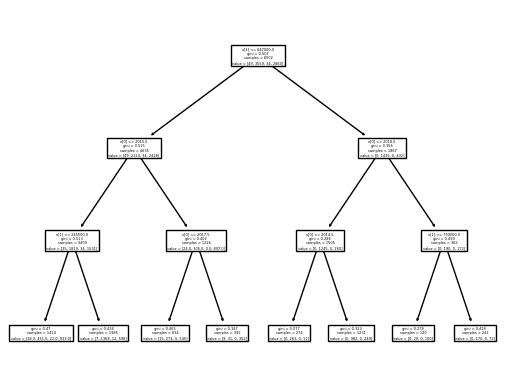

In [171]:
plot_tree(cars)

In [172]:
predicciones = cars.predict(X_test)

In [173]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Diesel,Petrol
Actual,,
CNG,1,7
Diesel,638,205
LPG,1,3
Petrol,236,535
